## T - Shirt Size Recommendation for Fashion based e-commerce
Team members:
Anjineyulu Annavarapu(annav1a),
Mohammad safayet khan(khan11m),
Shiva Mirala(miral1s),
Dammagoni yadika(damma1y)

In [1]:
import pandas as pd #stores values
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('Final_Dataset_96.csv')

In [3]:
# # DataFrame info

# In[50]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand Name           716 non-null    object 
 1   Type                 716 non-null    object 
 2   Size                 716 non-null    int64  
 3   Brand Size           716 non-null    object 
 4   Chest(cm)            716 non-null    float64
 5   Front Length(cm)     716 non-null    float64
 6   Across Shoulder(cm)  716 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 39.3+ KB


In [4]:
df.head()

,Brand Name,Type,Size,Brand Size,Chest(cm),Front Length(cm),Across Shoulder(cm)
0,Roadster,Cotton,38,S,100.3,73.7,40.0
1,Roadster,Cotton,40,M,107.4,74.7,42.0
2,Roadster,Cotton,46,L,115.1,74.7,47.0
3,Roadster,Cotton,47,XL,122.7,76.5,49.0
4,Roadster,Cotton,49,XXL,130.3,82.0,51.0


In [5]:
# # Last Five rows 

# In[7]:


df.tail()

,Brand Name,Type,Size,Brand Size,Chest(cm),Front Length(cm),Across Shoulder(cm)
711,Forca By Lifestyle,Cotton,34,XS,100.3,73.2,35.0
712,Forca By Lifestyle,Cotton,44,L,105.4,73.9,45.0
713,Forca By Lifestyle,Cotton,44,L,110.5,74.9,45.0
714,Forca By Lifestyle,Cotton,47,XL,115.6,75.9,49.0
715,Forca By Lifestyle,Cotton,49,XXL,120.7,77.2,51.0


In [6]:
# In[8]:


df.describe()

,Size,Chest(cm),Front Length(cm),Across Shoulder(cm)
count,716.000000,716.000000,716.000000,716.000000
mean,43.613128,114.073464,76.150140,45.493017
std,4.729292,38.089746,5.275587,4.808152
min,27.000000,11.800000,64.000000,30.000000
25%,40.000000,104.900000,73.700000,42.000000
50%,46.000000,111.800000,76.200000,47.000000
75%,47.000000,119.400000,78.700000,50.000000
max,50.000000,1067.000000,119.400000,55.900000


In [7]:
# # Different datatypes of the DataFrame

# In[9]:


df.dtypes

Brand Name              object
Type                    object
Size                     int64
Brand Size              object
Chest(cm)              float64
Front Length(cm)       float64
Across Shoulder(cm)    float64
dtype: object

In [8]:
# # Performed cleaning the DataFrame

# In[10]:


df = df.dropna()


In [9]:
# In[11]:


df.isnull().sum()

Brand Name             0
Type                   0
Size                   0
Brand Size             0
Chest(cm)              0
Front Length(cm)       0
Across Shoulder(cm)    0
dtype: int64

In [10]:
# # Describing one particular column in the DataFrame 

# In[12]:


df['Chest(cm)'].describe()

count     716.000000
mean      114.073464
std        38.089746
min        11.800000
25%       104.900000
50%       111.800000
75%       119.400000
max      1067.000000
Name: Chest(cm), dtype: float64

<AxesSubplot:xlabel='Size', ylabel='Across Shoulder(cm)'>

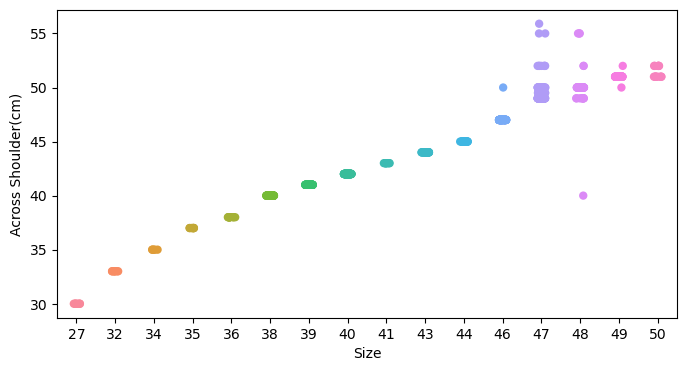

In [11]:
# ## Graphical representation(stripplot) of relationship between T-Shirt size  of various brands and Across Shoulder

# In[13]:


plt.figure(figsize=(8,4))
sns.stripplot(data=df, x="Size", y='Across Shoulder(cm)', jitter = True, size = 6)


In [12]:
# ## Unique values in Size column

# In[15]:


print(df['Size'].unique())


[38 40 46 47 49 50 39 43 48 32 36 27 41 35 44 34]


In [13]:
# In[16]:


s=(df.dtypes=="object") 
object_cols= list(s[s].index) 
label_encoder= LabelEncoder() 
for col in object_cols:
    df[col]= label_encoder.fit_transform(df[col])

In [14]:
col = 'Size'
X = df.loc[:, df.columns != col] # stores feature matrix in (X)
print(X)
y = df.Size # stores target variables 
print(y)

     Brand Name  Type  Brand Size  Chest(cm)  Front Length(cm)  \
0           123     0           2      100.3              73.7   
1           123     0           7      107.4              74.7   
2           123     0           6      115.1              74.7   
3           123     0           9      122.7              76.5   
4           123     0          11      130.3              82.0   
..          ...   ...         ...        ...               ...   
711          98     0          10      100.3              73.2   
712          98     0           6      105.4              73.9   
713          98     0           6      110.5              74.9   
714          98     0           9      115.6              75.9   
715          98     0          11      120.7              77.2   

     Across Shoulder(cm)  
0                   40.0  
1                   42.0  
2                   47.0  
3                   49.0  
4                   51.0  
..                   ...  
711               

### The Data set split Training set and Testing set

In [15]:
from sklearn.model_selection import train_test_split


### we are using split ratio of 70:30 for train data : test data

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [17]:
print(y_train)

28     46
43     47
42     46
73     46
167    38
       ..
71     39
106    36
270    47
435    49
102    40
Name: Size, Length: 501, dtype: int64


In [18]:
print(X_train)

     Brand Name  Type  Brand Size  Chest(cm)  Front Length(cm)  \
28           45     0           6      106.7              73.7   
43          129     0           9      111.8              77.0   
42          129     0           6      106.7              75.9   
73          120     0           6      119.4              76.2   
167         106     0           8      104.1              73.7   
..          ...   ...         ...        ...               ...   
71          120     0           8      109.2              73.7   
106         112     0          10       99.1              71.1   
270          59     0           9      132.1              81.3   
435          39     1          11      119.4              82.0   
102         121     0           7       99.1              70.6   

     Across Shoulder(cm)  
28                  47.0  
43                  50.0  
42                  47.0  
73                  47.0  
167                 40.0  
..                   ...  
71                

In [19]:
print(X_test)

     Brand Name  Type  Brand Size  Chest(cm)  Front Length(cm)  \
120          87     0           2      102.9              71.1   
331          13     0           7      106.2              76.2   
39          109     0          11      119.3              79.0   
636          89     0          11      127.0              76.2   
514          61     0           9      129.5              83.8   
..          ...   ...         ...        ...               ...   
536          67     0           9      129.5              78.7   
395          41     1           9      116.8              74.4   
482          54     0           8      101.6              73.7   
223          84     0           8      104.1              73.7   
140         107     0           8      100.3              71.9   

     Across Shoulder(cm)  
120                 40.0  
331                 43.0  
39                  51.0  
636                 51.0  
514                 49.0  
..                   ...  
536               

In [20]:
print(y_test)

120    38
331    41
39     49
636    49
514    48
       ..
536    47
395    47
482    39
223    38
140    38
Name: Size, Length: 215, dtype: int64


### heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

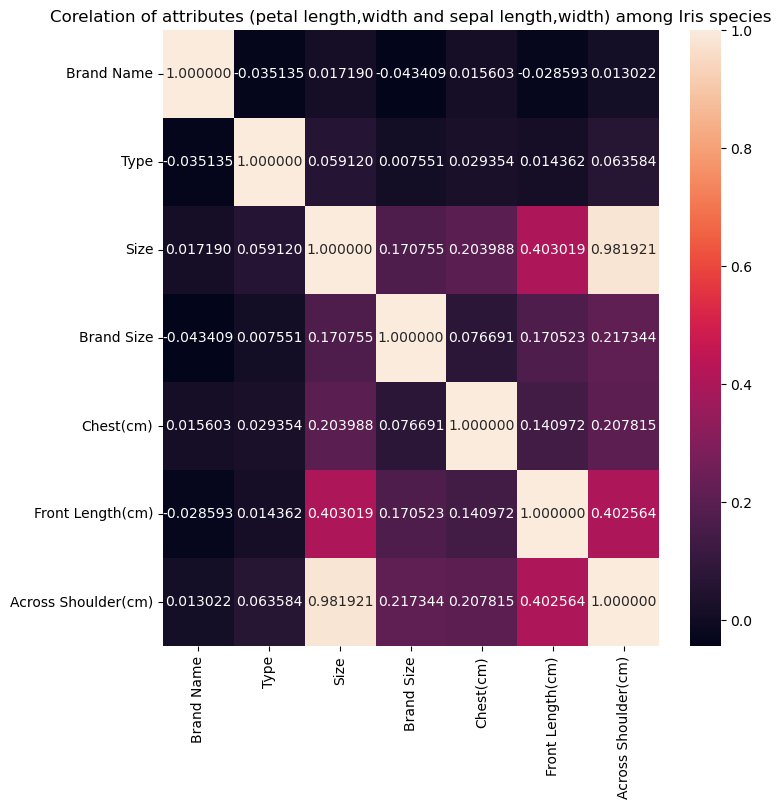

In [21]:
plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

### This is used to plot scatter graph to show the relationship between dependent variables and independent variables

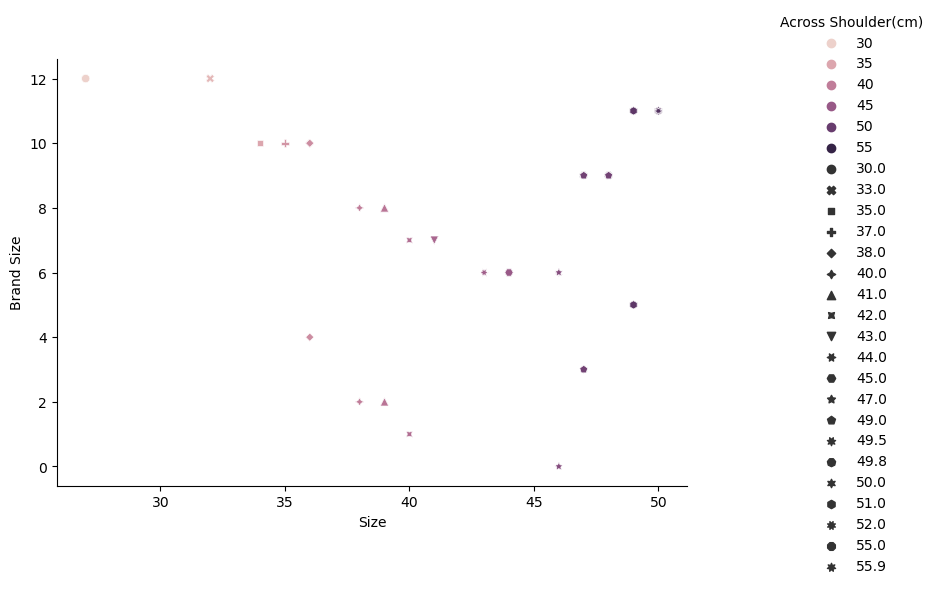

In [22]:
g=sns.relplot(x=df.columns[2],y=df.columns[3],data=df,hue='Across Shoulder(cm)',style='Across Shoulder(cm)')
g.fig.set_size_inches(10,5)

### The Box plots provide a visual summary of the data with whichwe can quickly identify the average value of the data,how dispersed the data is, whether the data is skewed or not (skewness). It is used to see how the categorical value of distributed with other numerical values

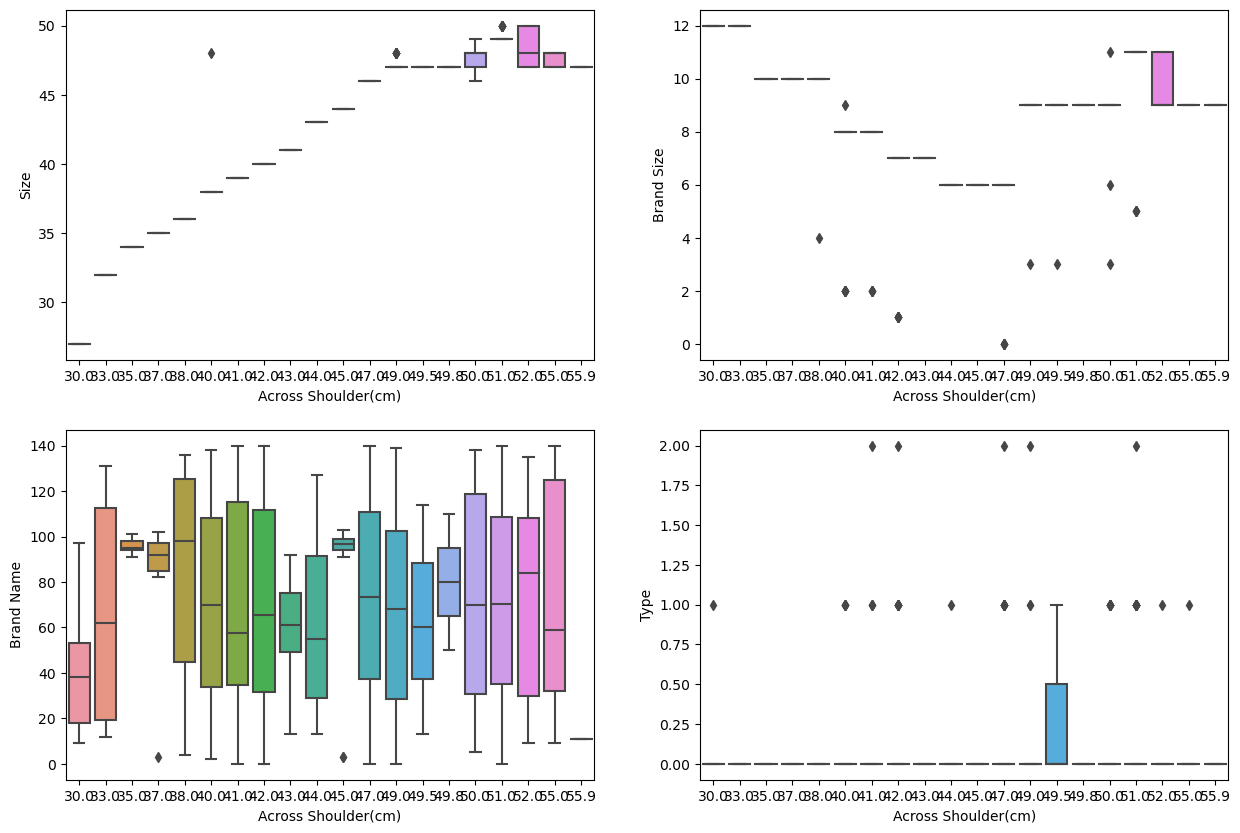

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Across Shoulder(cm)',y=df.columns[2],data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Across Shoulder(cm)',y=df.columns[3],data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Across Shoulder(cm)',y=df.columns[0],data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Across Shoulder(cm)',y=df.columns[1],data=df)
plt.show()

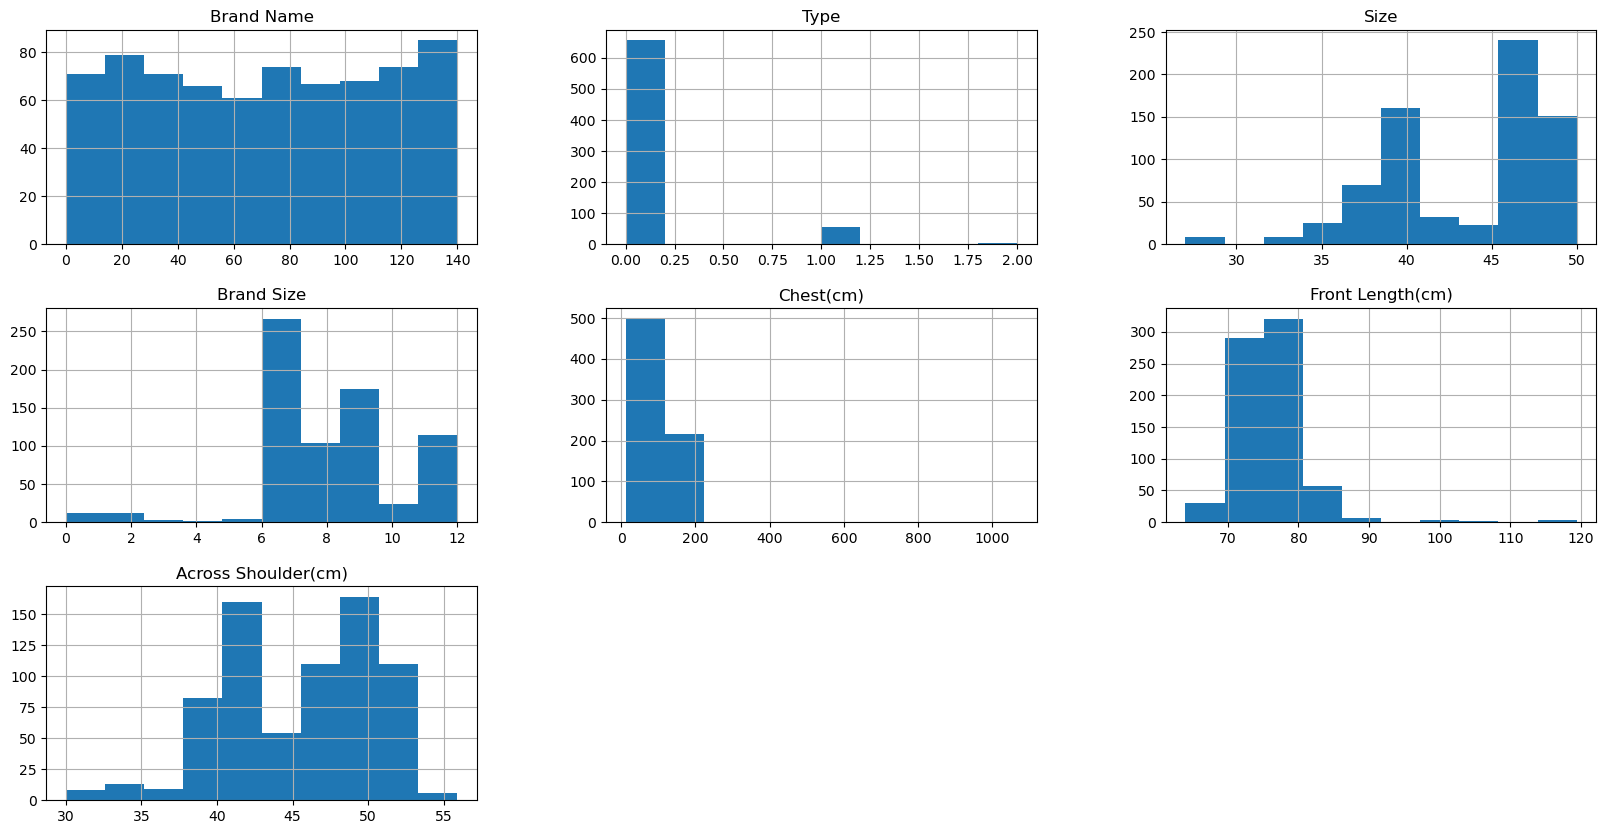

In [24]:
df.hist(figsize = [20,10])
plt.show()

In [25]:
col = 'Size'
X = df.loc[:, df.columns != col]
print(X)
y = df.Size
print(y)

     Brand Name  Type  Brand Size  Chest(cm)  Front Length(cm)  \
0           123     0           2      100.3              73.7   
1           123     0           7      107.4              74.7   
2           123     0           6      115.1              74.7   
3           123     0           9      122.7              76.5   
4           123     0          11      130.3              82.0   
..          ...   ...         ...        ...               ...   
711          98     0          10      100.3              73.2   
712          98     0           6      105.4              73.9   
713          98     0           6      110.5              74.9   
714          98     0           9      115.6              75.9   
715          98     0          11      120.7              77.2   

     Across Shoulder(cm)  
0                   40.0  
1                   42.0  
2                   47.0  
3                   49.0  
4                   51.0  
..                   ...  
711               

### Comparing the shape of training and testing sets

In [26]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (501, 6)
Shape of testing feature: (215, 6)
Shape of training label: (501,)
Shape of training label: (215,)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
type(np.asarray(y_train))

numpy.ndarray

In [29]:
regressor = LinearRegression()

In [30]:
y_train.unique()

array([46, 47, 38, 39, 40, 43, 48, 44, 49, 35, 36, 32, 27, 50, 41, 34],
      dtype=int64)

In [31]:
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([38.82355577, 41.26358385, 48.71919373, 48.66598893, 47.02849397,
       48.7205736 , 48.71369988, 48.74187651, 40.29837661, 43.20237331,
       40.26028949, 40.24407862, 48.70667746, 38.2045566 , 48.9027563 ,
       40.29518729, 45.30301444, 48.66058914, 43.31881912, 45.35082525,
       46.98983333, 38.26421353, 48.75107653, 45.25514592, 47.92548701,
       40.92675347, 38.27021885, 40.33442839, 45.23997322, 45.28267899,
       45.1673062 , 40.40101063, 47.81248732, 42.33673366, 48.68564967,
       46.92013285, 38.25565792, 41.3298102 , 45.25753895, 40.98930211,
       47.71575993, 40.3859162 , 45.28803991, 46.94856576, 45.33928166,
       48.30103788, 40.28928704, 38.27802081, 47.48111572, 47.76801794,
       45.28375739, 40.33042265, 47.99120248, 40.23322852, 33.66368068,
       45.20646351, 45.27989013, 40.34682112, 49.85685282, 47.89532218,
       48.73141412, 45.13136756, 40.21378354, 42.45799138, 31.00153814,
       40.28518424, 45.2945264 , 45.27764228, 40.21400296, 41.20

In [34]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score

In [35]:
score = regressor.score(X_test, y_test) 
print(score)

0.9696457840935512


### Performing clustering by importing K-Means from sklearn.cluster

In [36]:
from sklearn.cluster import KMeans

In [37]:
# ## In this model, the entire dataset has been used as a training data.
# ## Then an elbow method will be used to find out an optional number of "k" clusters.

# In[42]:


from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

In [38]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init = 12, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


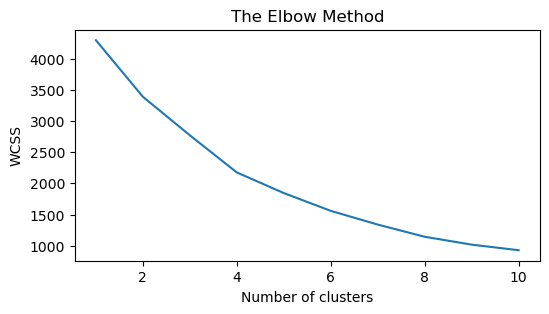

In [39]:
f3, ax = plt.subplots(figsize = (6, 3))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(X_scaled)

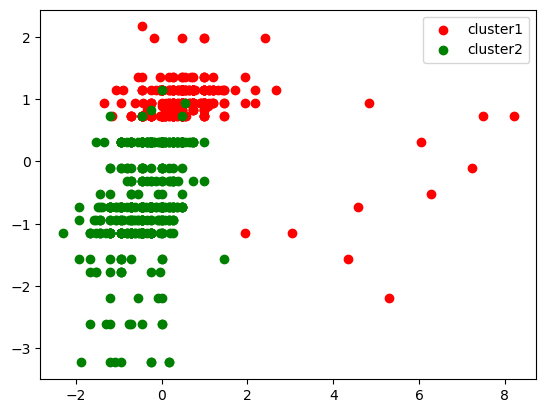

In [41]:
# ## Data visualization of clustering

# In[46]:


colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters == i, 4],
               X_scaled[clusters == i, 5],
               color = colors[i], label = 'cluster' + str(i+1))
plt.legend()

In [42]:
score = regressor.score(X_test, y_test) 
print(score)

0.9696457840935512
